In [1]:
import numpy as np
import scipy as sp
import scipy.ndimage as ndimage
import random

import pollution

import matplotlib.pyplot as plt
import matplotlib
from tqdm import trange
import tqdm
import os
import imageio.v2 as imageio
import math
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import networkx as nx
import os
import math
import matplotlib.ticker as mtick
import ipywidgets as widgets
from scipy.optimize import minimize_scalar, minimize
from matplotlib.lines import Line2D

font = {        'size'   : 20}
mpl.rc('font', **font)
# %matplotlib notebook

In [2]:
# folder = 'Data/Fixed Strategy/Two cost fixed mean/04_'
T=100
N=50
D=[40]
R=5
phi=5
L = 50
runs=50
mu_mean = 0.8
mu_min= np.arange(0,1.05,0.05)

cc = np.zeros((len(D),len(mu_min),runs))
cc_type = np.zeros((2,len(D),len(mu_min),runs))

world=pollution.World(L=L,N=N,D=D[0],phi=5,R=5,M_nu=0,mu=mu_min[1])
for a in world.agents:
    if a.type=='d':
        a.mu = mu_mean*N/D[0] - (N/D[0] - 1)*mu_min[1]

In [2]:
folder = 'Data/Fixed Strategy/Two cost by strategy/N80/04_'
mu_mean=0.4
T=200
N=80
D=[16,32,48,64]
R=5
phi=5
L = 50
runs=50
mu_min=np.arange(0,1.05,0.05)

pcp = np.zeros((len(D),len(mu_min),runs))
pcp_type = np.zeros((2,len(D),len(mu_min),runs))
cc = np.zeros((len(D),len(mu_min),runs))
cc_type = np.zeros((2,len(D),len(mu_min),runs))

for i in range(len(D)):
    mu_d = mu_mean*N/D[i] - (N/D[i] - 1)*mu_min
    for k in trange(runs):
        for j in range(len(mu_min)):
            world = pollution.World(L=L,N=N,D=D[i],phi=5,R=5,M_nu=0,mu=mu_min[j])
            for a in world.agents:
                if a.type=='d':
                    a.mu=mu_d[j]
            pcp[i,j,k] -= world.per_capita_pollution()
            for t in range(T):
                world.step()
            pcp[i,j,k] += world.per_capita_pollution()
            pcp_type[0,i,j,k] = np.nanmean([world.pollution_grid[a.position] 
                                           for a in world.agents 
                                           if a.type=='c'])
            pcp_type[1,i,j,k] = np.nanmean([world.pollution_grid[a.position] 
                                           for a in world.agents 
                                           if a.type=='d'])
            clusters = world.observe_clusters()
            if len(clusters)>0:
                for c in range(len(clusters)):
                    clusters[0].update(clusters[c])
                cc[i,j,k] = len(clusters[0])/len(world.agents)
                cc_type[:,i,j,k] = world.cluster_breakdown(by_strat=True)
np.savetxt(folder+'pcp.csv',pcp.reshape(len(D)*len(mu_min),runs))
np.savetxt(folder+'pcp_type.csv',pcp_type.reshape(2*len(D)*len(mu_min),runs))
np.savetxt(folder+'cc.csv',cc.reshape(len(D)*len(mu_min),runs))
np.savetxt(folder+'cc_type.csv',cc_type.reshape(2*len(D)*len(mu_min),runs))

100%|███████████████████████████████████████████| 50/50 [43:08<00:00, 51.78s/it]


In [3]:
folder = 'Data/Fixed Strategy/Two cost by strategy/N80/08_'
mu_mean=0.8
T=200
N=80
D=[16,32,48,64]
R=5
phi=5
L = 50
runs=50
mu_min=np.arange(0,1.05,0.05)

pcp = np.zeros((len(D),len(mu_min),runs))
pcp_type = np.zeros((2,len(D),len(mu_min),runs))
cc = np.zeros((len(D),len(mu_min),runs))
cc_type = np.zeros((2,len(D),len(mu_min),runs))

for i in range(len(D)):
    mu_d = mu_mean*N/D[i] - (N/D[i] - 1)*mu_min
    for k in trange(runs):
        for j in range(len(mu_min)):
            world = pollution.World(L=L,N=N,D=D[i],phi=5,R=5,M_nu=0,mu=mu_min[j])
            for a in world.agents:
                if a.type=='d':
                    a.mu=mu_d[j] #0.8*N/D[i] - (N/D[i] - 1)*mu_min[j]
            pcp[i,j,k] -= world.per_capita_pollution()
            for t in range(T):
                world.step()
            pcp[i,j,k] += world.per_capita_pollution()
            pcp_type[0,i,j,k] = np.nanmean([world.pollution_grid[a.position] 
                                           for a in world.agents 
                                           if a.type=='c'])
            pcp_type[1,i,j,k] = np.nanmean([world.pollution_grid[a.position] 
                                           for a in world.agents 
                                           if a.type=='d'])
            clusters = world.observe_clusters()
            if len(clusters)>0:
                for c in range(len(clusters)):
                    clusters[0].update(clusters[c])
                cc[i,j,k] = len(clusters[0])/len(world.agents)
                cc_type[:,i,j,k] = world.cluster_breakdown(by_strat=True)
np.savetxt(folder+'pcp.csv',pcp.reshape(len(D)*len(mu_min),runs))
np.savetxt(folder+'pcp_type.csv',pcp_type.reshape(2*len(D)*len(mu_min),runs))
np.savetxt(folder+'cc.csv',cc.reshape(len(D)*len(mu_min),runs))
np.savetxt(folder+'cc_type.csv',cc_type.reshape(2*len(D)*len(mu_min),runs))

100%|███████████████████████████████████████████| 50/50 [43:50<00:00, 52.60s/it]


# Figures

In [65]:
folder='Data/Fixed Strategy/Two cost by strategy/08_'
pcp = np.loadtxt(folder+'pcp.csv').reshape(4,len(np.arange(0,1.05,0.05)),50)
pcp_type = np.loadtxt(folder+'pcp_type.csv').reshape(2,4,len(np.arange(0,1.05,0.05)),50)
cc = np.loadtxt(folder+'cc.csv').reshape(4,len(np.arange(0,1.05,0.05)),50)
cc_type = np.loadtxt(folder+'cc_type.csv').reshape(2,4,len(np.arange(0,1.05,0.05)),50)

folder_fig = 'Figures/Fixed Strategy/Two cost by strategy/08_'
D=[10,20,30,40]
# R=5
# phi=5
L = 50
runs=50
mu_min=np.arange(0,1.05,0.05)
D_corners = [5,15,25,35,45]
mu_rich_corners = np.diff(np.array([-0.05]+list(mu_min)+[1.05]))/2 + np.arange(-0.05,1.05,0.05)
mu_mesh,D_mesh = np.meshgrid(mu_rich_corners,D_corners)

R = np.array([[np.corrcoef(cc[i,j,:],pcp[i,j,:])[1,0] for j in range(cc.shape[1])] 
              for i in range(cc.shape[0])])
R_type = np.array([[[np.corrcoef((cc_type[k,i,j,:]),
                                    (pcp_type[k,i,j,:]))[1,0] 
                     for j in range(cc_type.shape[2])] 
                    for i in range(cc_type.shape[1])] 
                   for k in range(cc_type.shape[0])])
R[np.isnan(R)] = 0
R_type[np.isnan(R_type)]=0

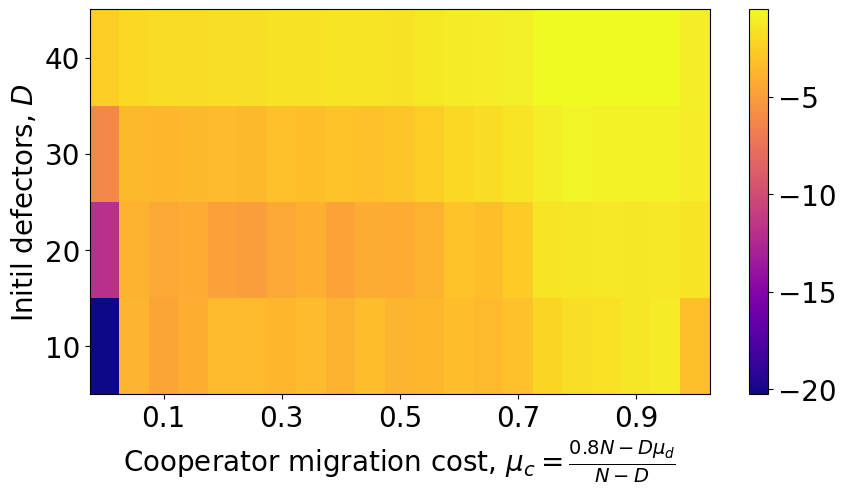

In [73]:
fig,ax = plt.subplots(figsize=(10,5))
# im=ax.imshow(pcp.mean(axis=-1),cmap='plasma',origin='lower')
im=ax.pcolormesh(mu_mesh,D_mesh,pcp.mean(axis=-1),cmap='plasma')
fig.colorbar(im)
ax.set_ylabel("Initil defectors, $D$")
ax.set_xlabel(r"Cooperator migration cost, $\mu_c = \frac{0.8N-D\mu_d}{N-D}$")

ax.set_xticks([0.1,0.3,0.5,0.7,0.9])
ax.set_xticklabels([0.1,0.3,0.5,0.7,0.9])
fig.savefig(folder+"pcp.png",bbox_inches='tight')

In [67]:
print(pcp_type[1,:,:,:].mean())

-1.5881371468174164


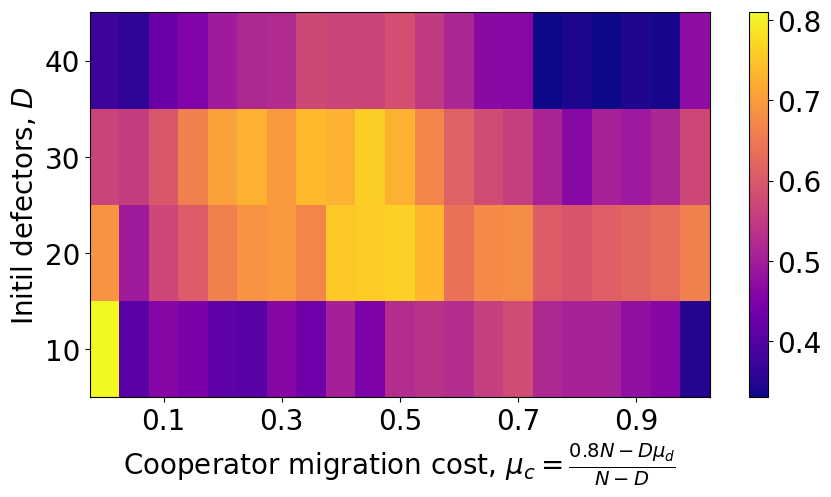

In [74]:
fig,ax = plt.subplots(figsize=(10,5))
# im=ax.imshow(pcp.mean(axis=-1),cmap='plasma',origin='lower')
im=ax.pcolormesh(mu_mesh,D_mesh,cc.mean(axis=-1),cmap='plasma')
fig.colorbar(im)
ax.set_ylabel("Initil defectors, $D$")
ax.set_xlabel(r"Cooperator migration cost, $\mu_c = \frac{0.8N-D\mu_d}{N-D}$")

ax.set_xticks([0.1,0.3,0.5,0.7,0.9])
ax.set_xticklabels([0.1,0.3,0.5,0.7,0.9])
fig.savefig(folder+"cc.png",bbox_inches='tight')

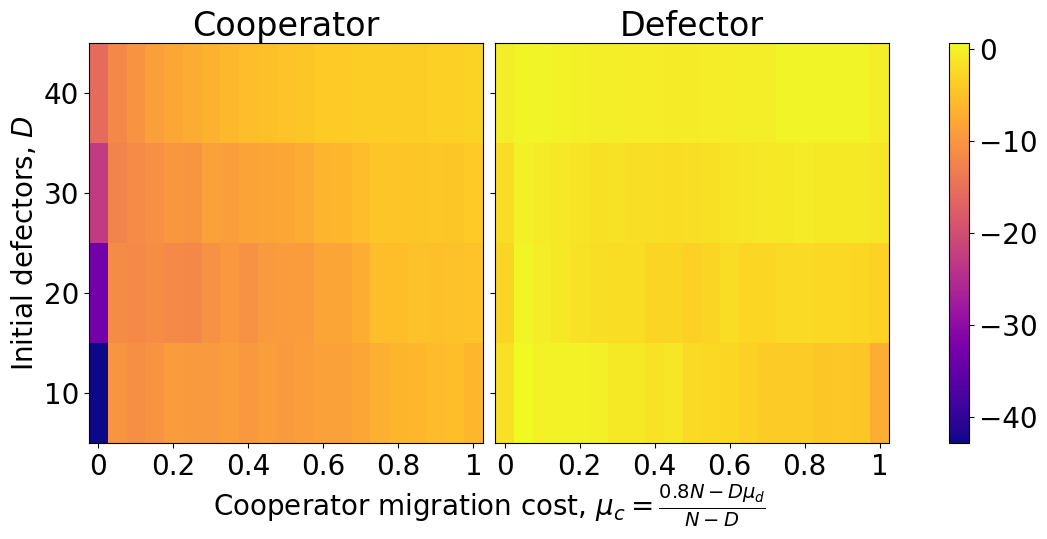

In [75]:
fig,axs = plt.subplots(figsize=(10,5),ncols=2,
                       sharex=True,sharey=True)
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05*5/8,
                    hspace=0.05)
# pcp_type_reduced = pcp_type[:,:,:,1:-1,:]

for i in range(2):
#     for j in range(2):
    im=axs[i].pcolormesh(mu_mesh, D_mesh,
                     np.nanmean(pcp_type[i,:,:,:],axis=-1),
                     cmap='plasma',
                     vmin=np.nanmean(pcp_type,axis=-1).min(),
                     vmax=np.nanmean(pcp_type,axis=-1).max())
#     axs[i].tick_params(axis='both', which='major', labelsize=15)
#     axs[i].tick_params(axis='both', which='major', labelsize=15)
    axs[i].set_xticks([0,0.2,0.4,0.6,0.8,1])
    axs[i].set_xticklabels([0,0.2,0.4,0.6,0.8,1])

fig.text(0.5, 0.02, r"Cooperator migration cost, $\mu_c = \frac{0.8N-D\mu_d}{N-D}$", ha='center',va='top')
fig.text(0.05, 0.5, "Initial defectors, $D$", va='center', rotation='vertical',ha='right')

pad = 5
axs[0].annotate("Cooperator",xy=(0.5, 1), xytext=(0, pad),
                  xycoords='axes fraction', 
                  textcoords='offset points',size='large', 
                  ha='center', va='baseline')
axs[1].annotate("Defector",xy=(0.5, 1), xytext=(0, pad),
                  xycoords='axes fraction', 
                  textcoords='offset points',size='large', 
                  ha='center', va='baseline')

cb_ax = fig.add_axes([0.96, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
fig.savefig(folder+"pcp_type.png",bbox_inches='tight')

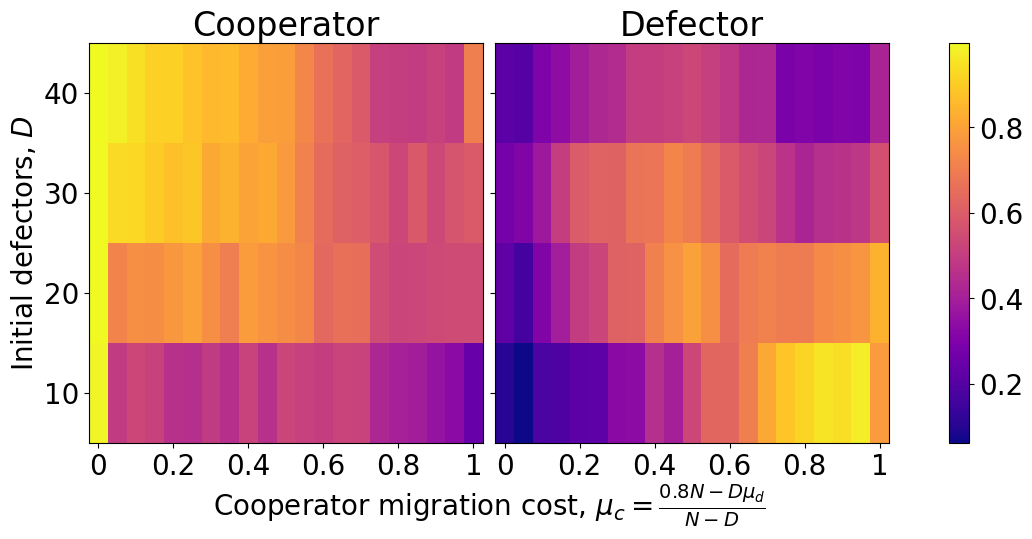

In [76]:
fig,axs = plt.subplots(figsize=(10,5),ncols=2,
                       sharex=True,sharey=True)
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05*5/8,
                    hspace=0.05)
# pcp_type_reduced = pcp_type[:,:,:,1:-1,:]

for i in range(2):
#     for j in range(2):
    im=axs[i].pcolormesh(mu_mesh, D_mesh,
                     np.nanmean(cc_type[i,:,:,:],axis=-1),
                     cmap='plasma',
                     vmin=np.nanmean(cc_type,axis=-1).min(),
                     vmax=np.nanmean(cc_type,axis=-1).max())
#     axs[i].tick_params(axis='both', which='major', labelsize=15)
#     axs[i].tick_params(axis='both', which='major', labelsize=15)
    axs[i].set_xticks([0,0.2,0.4,0.6,0.8,1])
    axs[i].set_xticklabels([0,0.2,0.4,0.6,0.8,1])

fig.text(0.5, 0.02, r"Cooperator migration cost, $\mu_c = \frac{0.8N-D\mu_d}{N-D}$", ha='center',va='top')
fig.text(0.05, 0.5, "Initial defectors, $D$", va='center', rotation='vertical',ha='right')

pad = 5
axs[0].annotate("Cooperator",xy=(0.5, 1), xytext=(0, pad),
                  xycoords='axes fraction', 
                  textcoords='offset points',size='large', 
                  ha='center', va='baseline')
axs[1].annotate("Defector",xy=(0.5, 1), xytext=(0, pad),
                  xycoords='axes fraction', 
                  textcoords='offset points',size='large', 
                  ha='center', va='baseline')

cb_ax = fig.add_axes([0.96, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
fig.savefig(folder+"cc_type.png",bbox_inches='tight')

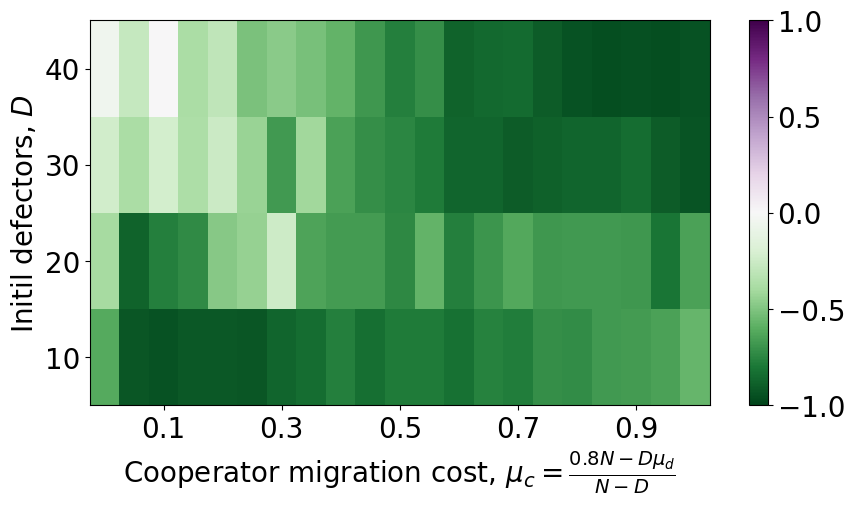

In [77]:
fig,ax = plt.subplots(figsize=(10,5))
# im=ax.imshow(pcp.mean(axis=-1),cmap='plasma',origin='lower')
im=ax.pcolormesh(mu_mesh,D_mesh,R,cmap='PRGn_r',vmin=-1,vmax=1)
fig.colorbar(im)
ax.set_ylabel("Initil defectors, $D$")
ax.set_xlabel(r"Cooperator migration cost, $\mu_c = \frac{0.8N-D\mu_d}{N-D}$")

ax.set_xticks([0.1,0.3,0.5,0.7,0.9])
ax.set_xticklabels([0.1,0.3,0.5,0.7,0.9])
fig.savefig(folder+"corr_coef.png",bbox_inches='tight')

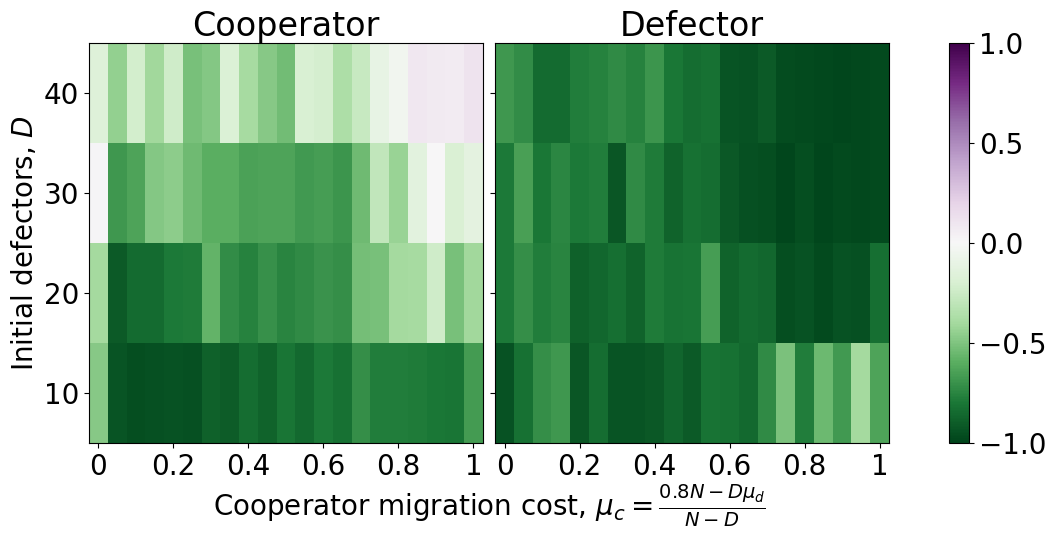

In [78]:
fig,axs = plt.subplots(figsize=(10,5),ncols=2,
                       sharex=True,sharey=True)
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05*5/8,
                    hspace=0.05)
# pcp_type_reduced = pcp_type[:,:,:,1:-1,:]

for i in range(2):
#     for j in range(2):
    im=axs[i].pcolormesh(mu_mesh, D_mesh,
                         R_type[i,:,:],
                         cmap='PRGn_r',
                         vmin=-1, vmax=1)
#     axs[i].tick_params(axis='both', which='major', labelsize=15)
#     axs[i].tick_params(axis='both', which='major', labelsize=15)
    axs[i].set_xticks([0,0.2,0.4,0.6,0.8,1])
    axs[i].set_xticklabels([0,0.2,0.4,0.6,0.8,1])

fig.text(0.5, 0.02, r"Cooperator migration cost, $\mu_c = \frac{0.8N-D\mu_d}{N-D}$", ha='center',va='top')
fig.text(0.05, 0.5, "Initial defectors, $D$", va='center', rotation='vertical',ha='right')

pad = 5
axs[0].annotate("Cooperator",xy=(0.5, 1), xytext=(0, pad),
                  xycoords='axes fraction', 
                  textcoords='offset points',size='large', 
                  ha='center', va='baseline')
axs[1].annotate("Defector",xy=(0.5, 1), xytext=(0, pad),
                  xycoords='axes fraction', 
                  textcoords='offset points',size='large', 
                  ha='center', va='baseline')

cb_ax = fig.add_axes([0.96, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)
fig.savefig(folder+"corr_coef_type.png",bbox_inches='tight')